# incidence de la varicelle


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

# Extraction des données localement


In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_file = "Varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [3]:
raw_data = pd.read_csv(data_file, skiprows=1)

raw_data


week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202136          7   3565     1748    5382       5           2   
1     202135          7   2562     1107    4017       4           2   
2     202134          7   1429      378    2480       2           0   
3     202133          7   3829     1830    5828       6           3   
4     202132          7   4108     1895    6321       6           3   
5     202131          7   4793     2301    7285       7           3   
6     202130          7   7190     4191   10189      11           6   
7     202129          7   6800     4109    9491      10           6   
8     202128          7   9734        0   21731      15           0   
9     202127          7   9026     4316   13736      14           7   
10    202126          7   7284     4108   10460      11           6   
11    202125          7   9351     6540   12162      14          10   
12    202124          7  12034     8937   15131      18          13   
13    202123          7   9116     6420   11812      14          10   
14    202122          7   4817     2752    6882       7           4   
15    202121          7   6092     3458    8726       9           5   
16    202120          7   7485     4601   10369      11           7   
17    202119          7   6654     4370    8938      10           7   
18    202118          7   3912     2110    5714       6           3   
19    202117          7   4686     2878    6494       7           4   
20    202116          7   4780     2891    6669       7           4   
21    202115          7  11215     7627   14803      17          12   
22    202114          7  11197     7994   14400      17          12   
23    202113          7   9714     6289   13139      15          10   
24    202112          7  11520     8415   14625      17          12   
25    202111          7   9386     6678   12094      14          10   
26    202110          7   9056     6452   11660      14          10   
27    202109          7  10988     7938   14038      17          12   
28    202108          7  11281     8361   14201      17          13   
29    202107          7  13561    10315   16807      21          16   
...      ...        ...    ...      ...     ...     ...         ...   
1576  199126          7  17608    11304   23912      31          20   
1577  199125          7  16169    10700   21638      28          18   
1578  199124          7  16171    10071   22271      28          17   
1579  199123          7  11947     7671   16223      21          13   
1580  199122          7  15452     9953   20951      27          17   
1581  199121          7  14903     8975   20831      26          16   
1582  199120          7  19053    12742   25364      34          23   
1583  199119          7  16739    11246   22232      29          19   
1584  199118          7  21385    13882   28888      38          25   
1585  199117          7  13462     8877   18047      24          16   
1586  199116          7  14857    10068   19646      26          18   
1587  199115          7  13975     9781   18169      25          18   
1588  199114          7  12265     7684   16846      22          14   
1589  199113          7   9567     6041   13093      17          11   
1590  199112          7  10864     7331   14397      19          13   
1591  199111          7  15574    11184   19964      27          19   
1592  199110          7  16643    11372   21914      29          20   
1593  199109          7  13741     8780   18702      24          15   
1594  199108          7  13289     8813   17765      23          15   
1595  199107          7  12337     8077   16597      22          15   
1596  199106          7  10877     7013   14741      19          12   
1597  199105          7  10442     6544   14340      18          11   
1598  199104          7   7913     4563   11263      14           8   
1599  199103          7  15387    10484   20290      27          18   
1600  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]


Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

In [6]:
sorted_data = raw_data.set_index('period').sort_index()

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)
        

# lecture data
 

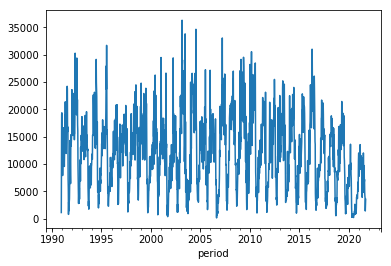

In [8]:
sorted_data['inc'].plot()


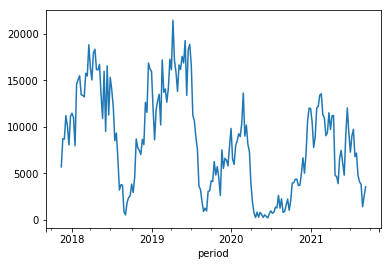

In [9]:
sorted_data['inc'][-200:].plot()


In [10]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    

In [12]:
one_year


period
2019-08-26/2019-09-01      922
2019-09-02/2019-09-08     1277
2019-09-09/2019-09-15      970
2019-09-16/2019-09-22     3078
2019-09-23/2019-09-29     3137
2019-09-30/2019-10-06     4211
2019-10-07/2019-10-13     4130
2019-10-14/2019-10-20     6279
2019-10-21/2019-10-27     4834
2019-10-28/2019-11-03     5728
2019-11-04/2019-11-10     4492
2019-11-11/2019-11-17     2638
2019-11-18/2019-11-24     7536
2019-11-25/2019-12-01     5542
2019-12-02/2019-12-08     6621
2019-12-09/2019-12-15     6424
2019-12-16/2019-12-22     5823
2019-12-23/2019-12-29     7941
2019-12-30/2020-01-05     9835
2020-01-06/2020-01-12     6534
2020-01-13/2020-01-19     5968
2020-01-20/2020-01-26     7991
2020-01-27/2020-02-02     8505
2020-02-03/2020-02-09     9264
2020-02-10/2020-02-16     8959
2020-02-17/2020-02-23    10424
2020-02-24/2020-03-01    13631
2020-03-02/2020-03-08     9011
2020-03-09/2020-03-15    10198
2020-03-16/2020-03-22     8123
2020-03-23/2020-03-29     7326
2020-03-30/2020-04-05     3879
2

In [13]:
assert abs(len(one_year)-52) < 2
    

In [14]:
yearly_incidence.append(one_year.sum())
   

In [15]:
 year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

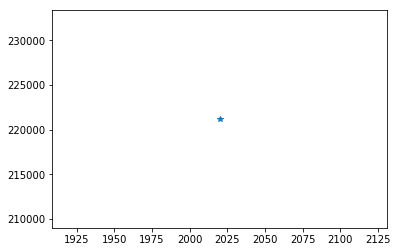

In [16]:
yearly_incidence.plot(style='*')

In [17]:
yearly_incidence.sort_values()


2020    221186
dtype: int64